In [1]:
import DRLPDE_main
import time

start = time.time()
model = DRLPDE_main.maintraining(param='JCPexample6' , use_cuda=True)

end = time.time()
print('Time to train: {:3.0f} minutes'.format((end - start)/60))

Using model from savedmodels/JCPexample6.pt
No errors in first epoch
Approx time: 40 minutes
step = 500/2000, 0.745 s/step, time-to-go:19 min
step = 1000/2000, 0.747 s/step, time-to-go:12 min
step = 1500/2000, 0.745 s/step, time-to-go: 6 min
step = 2000/2000, 0.748 s/step, time-to-go: 0 min
Time to train:  25 minutes


In [2]:
#import DRLPDE_postprocessing

#DRLPDE_postprocessing.postprocessing(param='JCPexample2',use_model='JCPexample1')

In [3]:
import examples.JCPexample6 as DRLPDE_param
import DRLPDE_functions

boundingbox = DRLPDE_param.boundingbox
list_of_dirichlet_boundaries = DRLPDE_param.list_of_dirichlet_boundaries
list_of_periodic_boundaries = DRLPDE_param.list_of_periodic_boundaries

Domain = DRLPDE_functions.DefineDomain.Domain(False, boundingbox, 
                                                  list_of_dirichlet_boundaries,
                                                  list_of_periodic_boundaries)

num_bdry = 2**12

Xbdry, Ubdry = DRLPDE_functions.DefineDomain.generate_boundary_points(num_bdry, boundingbox, Domain.boundaries, False)

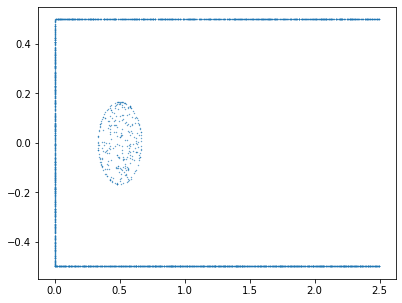

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 5.0])
ax.scatter(Xbdry[:,0].detach().numpy(), Xbdry[:,1].detach().numpy(), s=0.1, marker='o')